### Homework 6

By John Osorio C.C. 1035435726
* classify mnist_test.csv dataset
* what is the highest validation set accuracy you get (95%...?)
    * consider normalizing the data
    * changing optimizer (sgd,rmsprop,adam)...
    * number of epochs
    * structure of the Neural Network (number of neurons)
    * you can convert the labels to one-hot
* remember to fix the randomizer (maybe with the same number as I have here for comparison)

In [1]:
#Let's import the basic libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [24]:
#Let's build a function to get the model
#first we will let the number of neurons fixed to the original value
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=16,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

def compile_model(model, optimizer_):
    model.compile(optimizer=optimizer_,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [3]:
#let's fix the randomizer
tf.random.set_seed(1234)

In [4]:
#loading the data:

data = pd.read_csv('mnist_test.csv')
data = data.to_numpy()
X_data = data[:, 1:]
y_data = data[:, 0]

### Normalized vs unnormalized data

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_hidden (Dense)         (None, 16)                12560     
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 4s 12ms/step - loss: 26.5489 - accuracy: 0.1088 - val_loss: 2.3021 - val_accuracy: 0.1206
Epoch 2/10
225/225 [==============================] - 1s 2ms/step - loss: 2.3021 - accuracy: 0.1174 - val_loss: 2.3018 - val_accuracy: 0.1206
Epoch 3/10
225/225 [==============================] - 0s 2ms/step - loss: 2.3020 - accuracy: 0.1080 - val_loss: 2.3017 - val_accuracy: 0.1206
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 2.3014 - acc

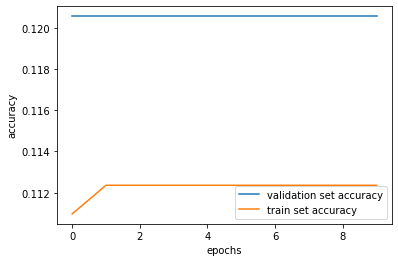

In [5]:
#unnormalized

(X_train, X_test, y_train, y_test)=train_test_split(X_data,y_data,test_size=0.1, random_state=3)
model = get_model(X_train[0].shape)
model.summary()
compile_model(model, 'sgd')
#---------------------
epochs=10
myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.2, verbose=True)
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy)
#---------------------------
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [6]:
#normalized

(X_train, X_test, y_train, y_test)=train_test_split(X_data ,y_data, test_size=0.1, random_state=3)
# Normalize the train dataset
X_train = tf.keras.utils.normalize(X_train, axis=1, order=2)
# Normalize the test dataset
X_test = tf.keras.utils.normalize(X_test, axis=1, order=2)

In [7]:
model = get_model(X_train[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_hidden (Dense)         (None, 16)                12560     
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
254/254 [==============================] - 1s 3ms/step - loss: 2.2925 - accuracy: 0.1844 - val_loss: 2.2786 - val_accuracy: 0.2822
Epoch 2/10
254/254 [==============================] - 1s 2ms/step - loss: 2.2747 - accuracy: 0.2877 - val_loss: 2.2588 - val_accuracy: 0.3011
Epoch 3/10
254/254 [==============================] - 0s 2ms/step - loss: 2.2535 - accuracy: 0.3157 - val_loss: 2.2343 - val_accuracy: 0.3578
Epoch 4/10
254/254 [==============================] - 1s 2ms/step - loss: 2.2263 - accuracy: 0.3746 - val_loss: 2.2054 - val_accuracy: 0.4144
Epoch 5/10
254/254 [==============================] - 1s 2ms/step - loss: 2.1957 - accuracy: 0.4325 - val_loss: 2.1713 - val_accuracy: 0.4722
Epoch 6/10
254/254 [==============================] - 1s 2ms/step - loss: 2.1627 - accuracy: 0.4788 - val_loss: 2.1314 - val_accuracy: 0.5078
Epoch 7/10
254/254 [==============================] - 0s 2ms/step - loss: 2.1196 - accuracy: 0.5052 - val_loss: 2.0861 - val_accuracy: 0.5467
Epoch 

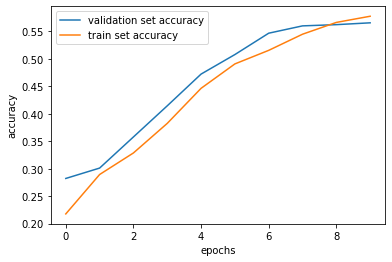

In [8]:
compile_model(model, 'sgd')
#---------------------
epochs=10
myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=True)
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy)
#---------------------------
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

Normalizing the data improves the accuracy

### Let's use four different optimizers

optimizer:  sgd
32/32 [==============================] - 0s 1ms/step - loss: 1.7802 - accuracy: 0.5680
optimizer:  adam
32/32 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.9060
optimizer:  rmsprop
32/32 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.9000
optimizer:  adagrad
32/32 [==============================] - 0s 2ms/step - loss: 2.2387 - accuracy: 0.3650


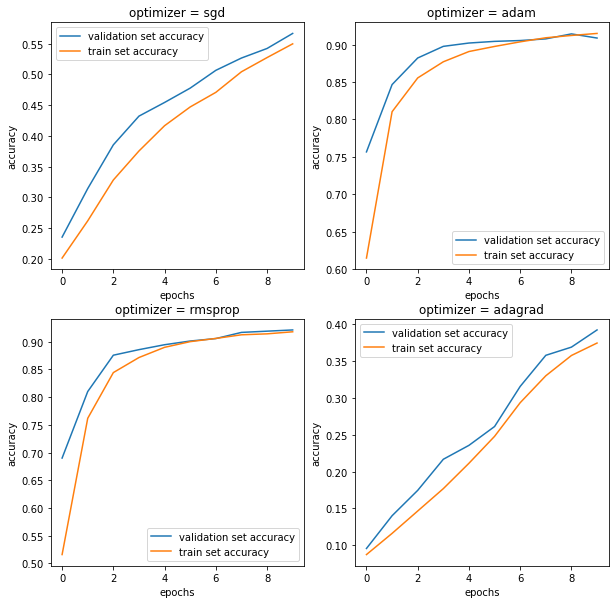

In [9]:
optimizer = ['sgd', 'adam', 'rmsprop', 'adagrad']
accuracy_ = np.zeros(4)
fig,ax=plt.subplots(2,2, figsize=(10, 10))
for i in range(len(optimizer)):
    print('optimizer: ', optimizer[i])
    row = i//2
    col = i%2
    model = get_model(X_train[0].shape)
    compile_model(model, optimizer[i])
    #---------------------
    epochs=10
    myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)
    loss, accuracy=model.evaluate(X_test, y_test)
    accuracy_[i] = accuracy
    #---------------------------
    xvals=range(epochs)    
    ax[row, col].set_title("optimizer = " + optimizer[i])
    ax[row, col].plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
    ax[row, col].plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
    ax[row, col].set_xlabel('epochs')
    ax[row, col].set_ylabel('accuracy')
    ax[row, col].legend()

For this set of data and epochs, the highest accuracy was obtained by both ADAM and RMSPROP.

### Let's try again with a higher number of epochs:

optimizer:  sgd
32/32 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.7950
optimizer:  adam
32/32 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9250
optimizer:  rmsprop
32/32 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9270
optimizer:  adagrad
32/32 [==============================] - 0s 1ms/step - loss: 2.0432 - accuracy: 0.4510


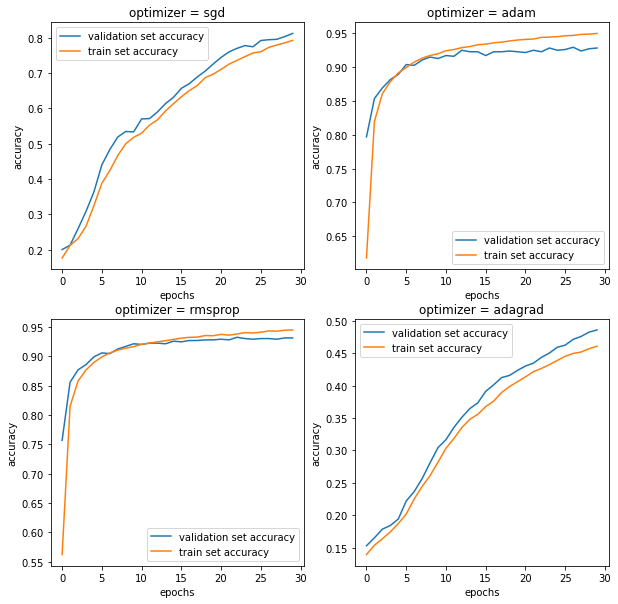

In [10]:
optimizer = ['sgd', 'adam', 'rmsprop', 'adagrad']
accuracy_ = np.zeros(4)
fig,ax=plt.subplots(2,2, figsize=(10, 10))
for i in range(len(optimizer)):
    print('optimizer: ', optimizer[i])
    row = i//2
    col = i%2
    model = get_model(X_train[0].shape)
    compile_model(model, optimizer[i])
    #---------------------
    epochs=30
    myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)
    loss, accuracy=model.evaluate(X_test, y_test)
    accuracy_[i] = accuracy
    #---------------------------
    xvals=range(epochs)    
    ax[row, col].set_title("optimizer = " + optimizer[i])
    ax[row, col].plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
    ax[row, col].plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
    ax[row, col].set_xlabel('epochs')
    ax[row, col].set_ylabel('accuracy')
    ax[row, col].legend()

The number of epochs improves the accuracy, specially for the SGD optimizer. But it is slower

### Let's fix the rmsprop optimizer, epochs = 30 and use a different number of neurons, 40 for hidden layer

In [25]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=40,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

32/32 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9320
0.9319999814033508


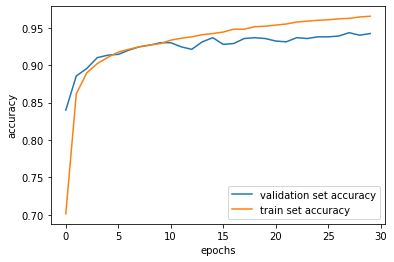

In [26]:
model = get_model(X_train[0].shape)
compile_model(model, 'rmsprop')
#---------------------
epochs=30
myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy)
#---------------------------
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

The accuracy improves slightly but it is slower to take more neurons

### Finally, let's convert the labels to one-hot

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
def compile_model(model, optimizer_):
    model.compile(optimizer=optimizer_,
                  loss='categorical_crossentropy',#since we are using one-hot encode
                  metrics=['accuracy'])

In [29]:
y_train_one_hot = to_categorical(y_train)

y_test_one_hot = to_categorical(y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9320
0.9319999814033508


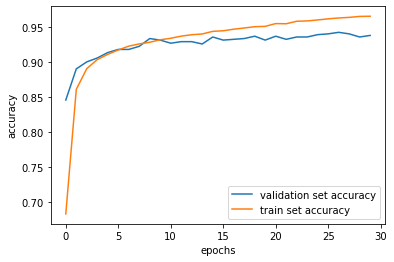

In [30]:
model = get_model(X_train[0].shape)

compile_model(model, 'rmsprop')

#---------------------
epochs=30
myhistory=model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)
loss, accuracy=model.evaluate(X_test, y_test_one_hot)
print(accuracy)
#---------------------------
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

There are not remarkable changes. The best accuracy we could get was 93.2%